In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

# Carga del catálogo (ajusta ruta según tu estructura)
df = pd.read_csv("../data/raw/catalogo_escuelas_sonora.csv")

print("✅ Datos cargados correctamente")
print("Shape:", df.shape)
df.head(3)


✅ Datos cargados correctamente
Shape: (13624, 89)


,cv_cct,c_nombre,cv_tipo,c_tipo,cv_administrativa,c_administrativa,cv_estatus,c_estatus,cv_motivo,c_motivo,cv_motivon2,c_descripcnmotivo,inmueble_cv_inmueble,inmueble_cv_vialidad_principal,inmueble_c_vialidad_principal,inmueble_cv_vialidad_derecha,inmueble_c_vialidad_derecha,inmueble_cv_vialidad_izquierda,inmueble_c_vialidad_izquierda,inmueble_cv_vialidad_posterior,inmueble_c_vialidad_posterior,inmueble_n_extnum,inmueble_c_extalf,inmueble_n_intnum,inmueble_c_intalf,inmueble_cv_ent,inmueble_c_nom_ent,inmueble_cv_mun,inmueble_c_nom_mun,inmueble_cv_loc,inmueble_c_nom_loc,inmueble_cv_asen,inmueble_c_nom_asen,inmueble_cv_codigo_postal,inmueble_c_desc_ubicacion,latitud,longitud,sostenimiento_cv_control,sostenimiento_c_control,sostenimiento_cv_subcontrol,sostenimiento_c_subcontrol,sostenimiento_cv_dependencian1,sostenimiento_c_dependencian1,sostenimiento_cv_dependencian2,sostenimiento_c_dependencian2,sostenimiento_cv_dependencian3,sostenimiento_c_dependencian3,sostenimiento_cv_dependencian4,sostenimiento_c_dependencian4,sostenimiento_cv_dependencian5,sostenimiento_cv_servicio,sostenimiento_c_servicio,depoperativa_cv_dependencian1,depoperativa_c_dependencian1,depoperativa_cv_dependencian2,depoperativa_c_dependencian2,depoperativa_cv_dependencian3,depoperativa_c_dependencian3,depoperativa_cv_dependencian4,depoperativa_c_dependencian4,depoperativa_cv_dependencian5,contacto_c_curp,contacto_c_rfc,contacto_c_nombre,contacto_c_apellido1,contacto_c_apellido2,contacto_c_email,contacto_c_telefono,contacto_c_celular,contacto_c_extension,contacto_c_pweb,serreg_cv_cct,jefsec_cv_cct,supervision_cv_cct,institucion,c_tuno_01,c_tuno_2,c_tuno_3,tiponivelsub_cv_servicion1,tiponivelsub_c_servicion1,tiponivelsub_cv_servicion2,tiponivelsub_c_servicion2,tiponivelsub_cv_servicion3,tiponivelsub_c_servicion3,caracteristca_cv_caracterizan1,caracteristca_c_caracterizan1,caracteristca_cv_caracterizan2,caracteristca_c_caracterizan2,fn_sostenimiento_cv_servicio
0,26BBE2696K,BIBLIOTECA DE LA PREPARATORIA POPULAR MEXICO,7,BIBLIOTECA,26,SONORA,0,INACTIVO,3,CAUSAS ADMINISTRATIVAS,5,OTRA ESPECIFIQUE,26INM36551,118994,NINGUNO NINGUNO,455637,NINGUNO NINGUNO,725225,NINGUNO NINGUNO,1023060,NINGUNO NINGUNO,0,DOMICILIO CONOCIDO SN,0,NaN,26,SONORA,55,SAN LUIS RÃO COLORADO,1,SAN LUIS RÃO COLORADO,34,NINGUNO,0,NaN,32.476667,-114.762500,2.0,PRIVADO,1.0,PRIVADO,1.0,INICIATIVA PRIVADA,1.0,ASOCIACIÃN CIVIL,0.0,NaN,0.0,NaN,0.0,B03,BIBLIOTECA ESCOLAR DE NIVEL MEDIO SUPERIOR (BA...,1.0,INICIATIVA PRIVADA,1.0,ASOCIACIÃN CIVIL,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,TESTADO,NaN,NaN,NaN,26ADG0004T,NaN,NaN,NaN,DISCONTINUO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26KPR0173F,CURSO COMUNITARIO,9,ESCUELA,26,SONORA,0,INACTIVO,3,CAUSAS ADMINISTRATIVAS,5,OTRA ESPECIFIQUE,26INM364DF,118984,NINGUNO NINGUNO,455614,NINGUNO NINGUNO,725199,NINGUNO NINGUNO,1023034,NINGUNO NINGUNO,0,DOMICILIO CONOCIDO SN,0,NaN,26,SONORA,52,SAHUARIPA,545,LA CEBADILLA,1,NINGUNO,85600,NaN,29.255556,-108.967222,1.0,PÃBLICO,1.0,FEDERAL,1.0,PRESIDENCIA DE LA REPÃBLICA,2.0,SECRETARÃA DE EDUCACIÃN PÃBLICA,6.0,ORGANISMOS DESCENTRALIZADOS DE LA SECRETARÃA ...,9.0,CONSEJO NACIONAL DE FOMENTO EDUCATIVO,0.0,9999,SERVICIO EDUCATIVO,1.0,PRESIDENCIA DE LA REPÃBLICA,2.0,SECRETARÃA DE EDUCACIÃN PÃBLICA,6.0,ORGANISMOS DESCENTRALIZADOS DE LA SECRETARÃA ...,9.0,CONSEJO NACIONAL DE FOMENTO EDUCATIVO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26ADG0016Y,NaN,NaN,NaN,MATUTINO,NaN,NaN,2.0,BÃSICA,2.0,PRIMARIA,2.0,COMUNITARIO,0.0,NO APLICA,0.0,NO APLICA,9999.0
2,26KPR0193T,CURSO COMUNITARIO,9,ESCUELA,26,SONORA,0,INACTIVO,3,CAUSAS ADMINISTRATIVAS,5,OTRA ESPECIFIQUE,26INM35CF4,117880,NINGUNO NINGUNO,454353,NINGUNO NINGUNO,723941,NINGUNO NINGUNO,1021670,NINGUNO NINGUNO,0,DOMICILIO CONOCIDO SN,0,NaN,26,SONORA,30,HERMOSILLO,138,EL BAJÃO,1,NINGUNO,83340,NaN,28.795000,-111.271389,1.0,PÃBLICO,1.0,FEDERAL,1.0,PRESIDENCIA DE LA REPÃBLICA,2.0,SECRETARÃA DE EDUCACIÃN PÃBLICA,6.0,ORGANISMOS DESCENTRALIZADOS DE LA SECRETA

In [5]:
df.info()

# Columnas con valores nulos
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'faltantes': missing, 'porcentaje': missing_pct})
display(missing_df.head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13624 entries, 0 to 13623
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cv_cct                          13624 non-null  object 
 1   c_nombre                        13624 non-null  object 
 2   cv_tipo                         13624 non-null  int64  
 3   c_tipo                          13624 non-null  object 
 4   cv_administrativa               13624 non-null  int64  
 5   c_administrativa                13624 non-null  object 
 6   cv_estatus                      13624 non-null  int64  
 7   c_estatus                       13624 non-null  object 
 8   cv_motivo                       13624 non-null  int64  
 9   c_motivo                        6050 non-null   object 
 10  cv_motivon2                     13624 non-null  int64  
 11  c_descripcnmotivo               6049 non-null   object 
 12  inmueble_cv_inmueble            

,faltantes,porcentaje
c_tuno_3,13594,99.779800
inmueble_c_desc_ubicacion,13496,99.060482
inmueble_c_intalf,13449,98.715502
c_tuno_2,13243,97.203464
contacto_c_pweb,13078,95.992366
institucion,12901,94.693188
contacto_c_extension,12887,94.590429
sostenimiento_c_dependencian4,10662,78.258955
sostenimiento_c_dependencian3,10093,74.082501
contacto_c_celular,9547,70.074868


In [8]:
cols_utiles = [
    "cv_cct", "c_nombre", "cv_estatus", "c_estatus",
    "tiponivelsub_c_servicion2", "tiponivelsub_c_servicion3",
    "fn_sostenimiento_cv_servicio", "inmueble_c_nom_mun"
]

df = df[cols_utiles]
df.columns = [
    "cct", "nombre", "cv_estatus", "estatus",
    "nivel1", "nivel2", "sostenimiento", "municipio"
]

print("✅ Columnas filtradas:", df.shape)
df.head(5)


✅ Columnas filtradas: (13624, 8)


,cct,nombre,cv_estatus,estatus,nivel1,nivel2,sostenimiento,municipio
0,26BBE2696K,BIBLIOTECA DE LA PREPARATORIA POPULAR MEXICO,0,INACTIVO,NaN,NaN,NaN,SAN LUIS RÃO COLORADO
1,26KPR0173F,CURSO COMUNITARIO,0,INACTIVO,PRIMARIA,COMUNITARIO,9999.0,SAHUARIPA
2,26KPR0193T,CURSO COMUNITARIO,0,INACTIVO,PRIMARIA,COMUNITARIO,9999.0,HERMOSILLO
3,26KPR0740I,CURSO COMUNITARIO,1,ACTIVO,PRIMARIA,COMUNITARIO,9999.0,NAVOJOA
4,26PBH0080B,UNIVERSIDAD DEL DESARROLLO PROFESIONAL,1,ACTIVO,MEDIA SUPERIOR,BACHILLERATO GENERAL,9999.0,HERMOSILLO


C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\2921676736.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estatus_count.index, y=estatus_count.values, palette="crest")


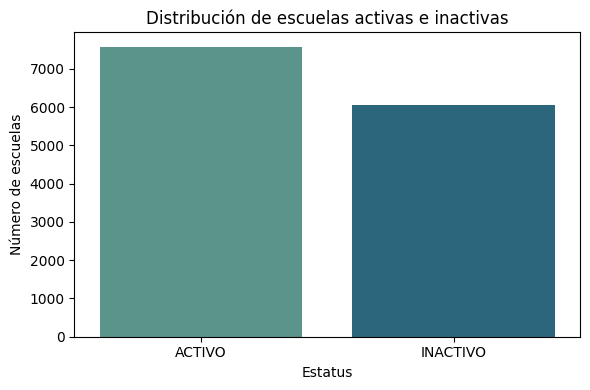

estatus
ACTIVO      7574
INACTIVO    6050
Name: count, dtype: int64


In [9]:
# ==========================================
# 4. Análisis de estatus de escuelas
# ==========================================
estatus_count = df["estatus"].value_counts(dropna=False)

plt.figure(figsize=(6,4))
sns.barplot(x=estatus_count.index, y=estatus_count.values, palette="crest")
plt.title("Distribución de escuelas activas e inactivas")
plt.ylabel("Número de escuelas")
plt.xlabel("Estatus")
plt.tight_layout()
plt.show()

print(estatus_count)


C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4189287578.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=niveles.index, x=niveles.values, palette="viridis")
C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4189287578.py:11: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4189287578.py:11: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4189287578.py:11: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jes

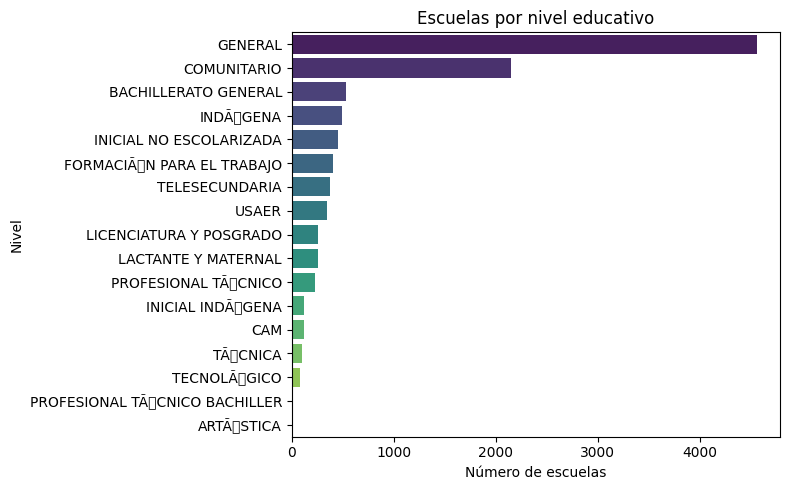

nivel2
GENERAL                           4560
COMUNITARIO                       2152
BACHILLERATO GENERAL               531
INDÃGENA                          490
INICIAL NO ESCOLARIZADA            458
FORMACIÃN PARA EL TRABAJO         406
TELESECUNDARIA                     379
USAER                              348
LICENCIATURA Y POSGRADO            260
LACTANTE Y MATERNAL                257
PROFESIONAL TÃCNICO               224
INICIAL INDÃGENA                  118
CAM                                117
TÃCNICA                           105
TECNOLÃGICO                        81
PROFESIONAL TÃCNICO BACHILLER      14
ARTÃSTICA                          13
Name: count, dtype: int64


In [10]:
# ==========================================
# 5. Distribución por nivel educativo
# ==========================================
niveles = df["nivel2"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(y=niveles.index, x=niveles.values, palette="viridis")
plt.title("Escuelas por nivel educativo")
plt.xlabel("Número de escuelas")
plt.ylabel("Nivel")
plt.tight_layout()
plt.show()

print(niveles)


C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4069652867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sost = df["sostenimiento"] = df["sostenimiento"].replace({9999: "NO ESPECIFICADO"})
C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4069652867.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sost.index, y=sost.values, palette="mako")


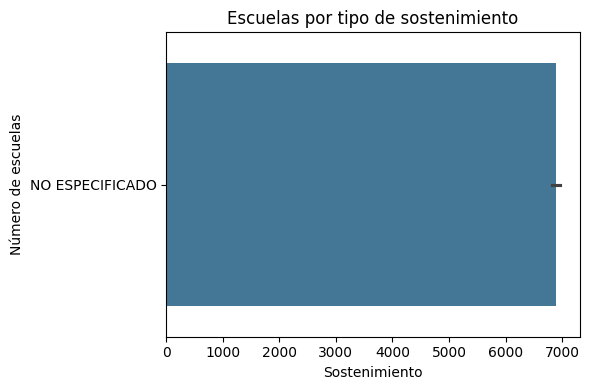

0                    NaN
1        NO ESPECIFICADO
2        NO ESPECIFICADO
3        NO ESPECIFICADO
4        NO ESPECIFICADO
              ...       
13619    NO ESPECIFICADO
13620    NO ESPECIFICADO
13621    NO ESPECIFICADO
13622    NO ESPECIFICADO
13623    NO ESPECIFICADO
Name: sostenimiento, Length: 13624, dtype: object


In [13]:
# ==========================================
# 6. Distribución por sostenimiento
# ==========================================
sost = df["sostenimiento"] = df["sostenimiento"].replace({9999: "NO ESPECIFICADO"})


plt.figure(figsize=(6,4))
sns.barplot(x=sost.index, y=sost.values, palette="mako")
plt.title("Escuelas por tipo de sostenimiento")
plt.ylabel("Número de escuelas")
plt.xlabel("Sostenimiento")
plt.tight_layout()
plt.show()

print(sost)


C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4152465409.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=escuelas_mpio.head(15).index, x=escuelas_mpio.head(15).values, palette="flare")
C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4152465409.py:11: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4152465409.py:11: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Jesus\AppData\Local\Temp\ipykernel_34784\4152465409.py:11: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Jesus\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

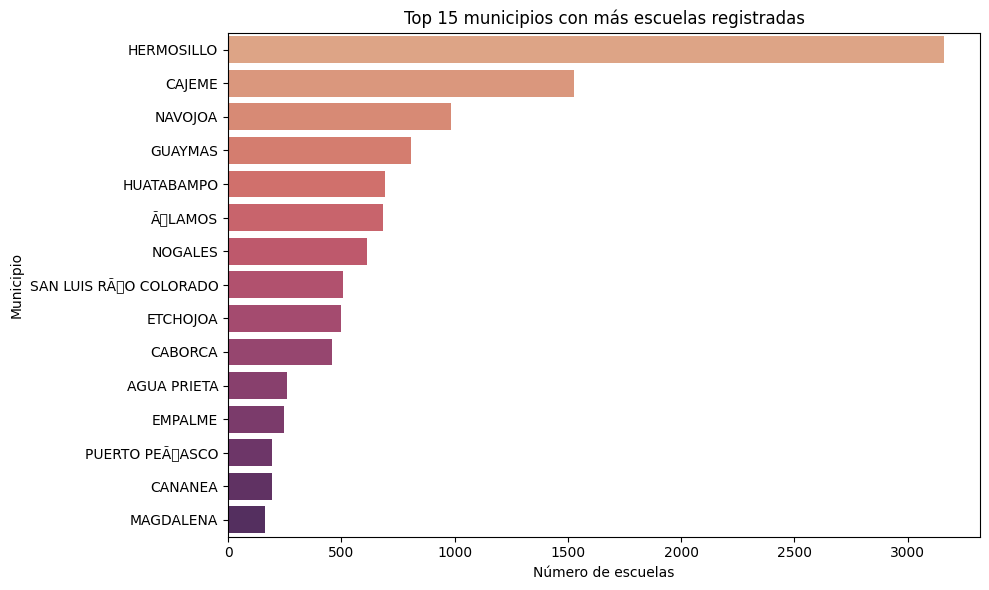

municipio
HERMOSILLO                3162
CAJEME                    1527
NAVOJOA                    983
GUAYMAS                    807
HUATABAMPO                 693
ÃLAMOS                    686
NOGALES                    615
SAN LUIS RÃO COLORADO     509
ETCHOJOA                   499
CABORCA                    459
Name: cct, dtype: int64


In [14]:
# ==========================================
# 7. Conteo de escuelas por municipio
# ==========================================
escuelas_mpio = df.groupby("municipio")["cct"].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=escuelas_mpio.head(15).index, x=escuelas_mpio.head(15).values, palette="flare")
plt.title("Top 15 municipios con más escuelas registradas")
plt.xlabel("Número de escuelas")
plt.ylabel("Municipio")
plt.tight_layout()
plt.show()

print(escuelas_mpio.head(10))


In [15]:
# ==========================================
# 8. Proporción público/privado por municipio
# ==========================================
tabla_sost = (
    df.groupby(["municipio", "sostenimiento"])["cct"]
      .count().unstack(fill_value=0)
)
tabla_sost["total"] = tabla_sost.sum(axis=1)
tabla_sost["porc_privadas"] = (tabla_sost.get("PRIVADO", 0) / tabla_sost["total"]) * 100

tabla_sost.sort_values("porc_privadas", ascending=False).head(10)


sostenimiento,NO ESPECIFICADO,total,porc_privadas
municipio,,,
ACONCHI,17,17,0.0
AGUA PRIETA,205,205,0.0
ALTAR,41,41,0.0
ARIVECHI,14,14,0.0
ARIZPE,36,36,0.0
ATIL,5,5,0.0
BACADÃHUACHI,5,5,0.0
BACANORA,21,21,0.0
BACERAC,32,32,0.0


In [17]:
# ==========================================
# 9. Guardar versión limpia para cruces
# ==========================================
df_limpio = df.copy()
df_limpio.dropna(subset=["municipio"], inplace=True)

df_limpio.to_csv("../data/processed/catalogo_escuelas_sonora_limpio.csv", index=False)
print("💾 Archivo limpio guardado en data/processed/catalogo_escuelas_sonora_limpio.csv")


💾 Archivo limpio guardado en data/processed/catalogo_escuelas_sonora_limpio.csv
